<a href="https://colab.research.google.com/github/Asayil-20/ecommerce-user-behavior-analysis/blob/main/ecommerce_user_behavior_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛒 E-Commerce User Behavior – Exploratory Data Analysis

In this project, I explored user behavior data from an e-commerce platform.<br>
The goal is to identify behavioral patterns and uncover insights that help understand how users interact with the platform and what factors influence their purchasing decisions.
<br><br>

📊 **Dataset Description**:<br>
Each row in the dataset represents a single user session.<br>
The dataset includes the following columns:

- `user_id`: Unique identifier for each user  
- `gender`: Gender of the user (Male or Female)  
- `age`: Age of the user  
- `platform_used`: Platform used during the session (App or Website)  
- `session_duration`: Total session duration in minutes  
- `pages_visited`: Number of pages browsed during the session  
- `purchase_amount`: Total amount spent in that session  
- `region`: Geographic region of the user  
- `returned_customer`: Indicates whether the user is a returning customer (Yes or No)
<br><br>
📌 **Approach**:<br>
I used data visualizations to explore relationships between variables and identify trends.<br>
Each visualization is followed by a brief interpretation summarizing the key insight.<br>
The goal is to communicate findings clearly and concisely using evidence from the data.



In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 🔹 Initial Exploration of the Dataset

Before diving into deeper analysis, I began with an initial review of the dataset `ecommerce_data_realistic.csv`.<br>
The purpose of this step is to understand the overall structure of the data and identify any potential issues such as missing values or duplicates.
<br><br>

The tasks performed in this stage included:

- Loading the dataset and previewing the first 5 rows using `.head()`  
- Checking the shape of the dataset (number of rows and columns)  
- Using `.info()` to understand data types and detect any null values  
- Identifying and handling any missing data  
- Checking for and removing duplicate rows if any
<br><br>

This step provides a big-picture overview of the dataset and helps set the foundation for the rest of the analysis.

In [ ]:
df = pd.read_csv("/content/ecommerce_data.csv")
print("✅ أول 5 صفوف من البيانات:")
display(df.head())

✅ أول 5 صفوف من البيانات:


,user_id,gender,age,platform_used,session_duration,pages_visited,region,returned_customer,purchase_amount
0,1,Male,32.0,App,18.2,17,Riyadh,No,51.90
1,2,Male,45.0,Web,16.6,10,Abha,No,113.86
2,3,Female,37.0,App,6.7,9,Dammam,Yes,77.61
3,4,Female,25.0,App,13.3,14,Jeddah,Yes,39.08
4,5,Male,22.0,Web,19.8,18,Riyadh,Yes,93.71


In [ ]:
print(f"\n عدد الصفوف: {df.shape[0]}, عدد الاعمدة: {df.shape[1]}")


 عدد الصفوف: 499, عدد الاعمدة: 9


In [ ]:
print("\n Info عن البيانات:")
df.info()


 Info عن البيانات:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            499 non-null    int64  
 1   gender             490 non-null    object 
 2   age                494 non-null    float64
 3   platform_used      499 non-null    object 
 4   session_duration   499 non-null    float64
 5   pages_visited      499 non-null    int64  
 6   region             499 non-null    object 
 7   returned_customer  499 non-null    object 
 8   purchase_amount    499 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 35.2+ KB


In [ ]:
print("\n القيم المفقودة في كل عمود :")
print(df.isnull().sum())


 القيم المفقودة في كل عمود :
user_id              0
gender               9
age                  5
platform_used        0
session_duration     0
pages_visited        0
region               0
returned_customer    0
purchase_amount      0
dtype: int64


In [ ]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['gender'].fillna("Unknown", inplace=True)

<ipython-input-8-faa02df24e7b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
<ipython-input-8-faa02df24e7b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
print(f"\n عدد الصفوف المكررة قبل الحذف: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f" عدد الصفوف بعد حذف التكرار: {df.shape[0]}")


 عدد الصفوف المكررة قبل الحذف: 0
 عدد الصفوف بعد حذف التكرار: 499


In [ ]:
print("\n التحقق من القيم المفقودة:")
print(df.isnull().sum())


 التحقق من القيم المفقودة:
user_id              0
gender               0
age                  0
platform_used        0
session_duration     0
pages_visited        0
region               0
returned_customer    0
purchase_amount      0
dtype: int64


# 🧠 Exploring Individual Features

As a first step in my analysis, I explored a few key features individually to understand the overall structure and distribution of the data.  
This helped build an initial understanding of the user base before moving on to deeper insights.

The features I focused on include:

- `gender`: To see the distribution between male and female users  
- `age`: To examine which age groups are most active on the platform  
- `platform_used`: To identify whether users prefer the App or the Website  
- `returned_customer`: To understand whether most users are new or returning

These visualizations provided early insights into **user demographics, usage preferences**, and **engagement patterns**, which helped shape the direction of further analysis.


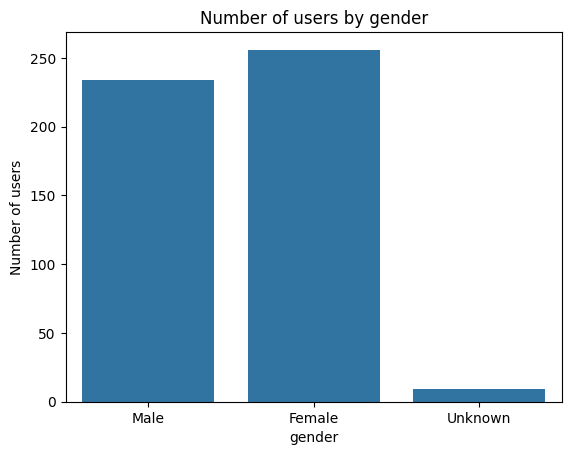

In [ ]:
plt.figure()
sns.countplot(data=df, x='gender')
plt.title("Number of users by gender")
plt.xlabel("gender")
plt.ylabel("Number of users")
plt.show()

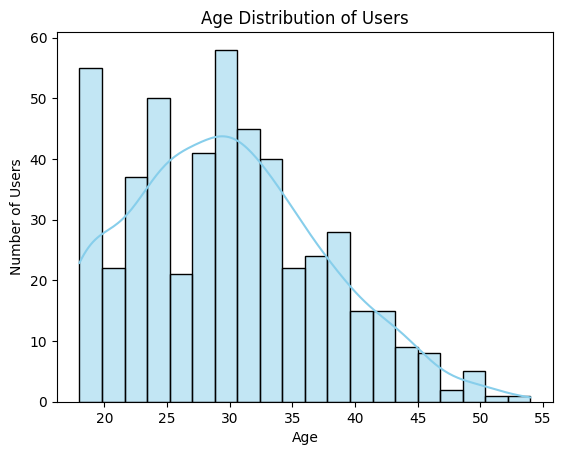

In [ ]:
plt.figure()
sns.histplot(data=df, x='age', bins=20, kde=True, color="skyblue")
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.show()

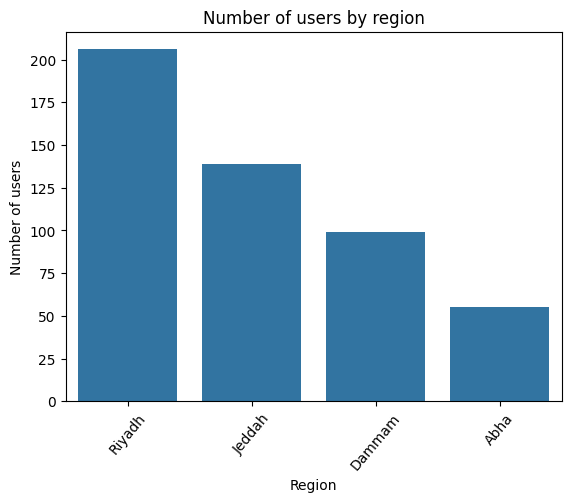

In [ ]:
plt.figure()
sns.countplot(data=df, x='region', order=df['region'].value_counts().index)
plt.title("Number of users by region")
plt.xlabel("Region")
plt.ylabel("Number of users")
plt.xticks(rotation=50)
plt.show()

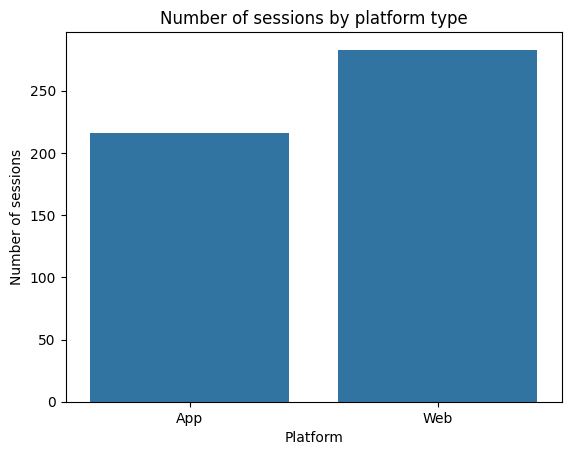

In [ ]:
plt.figure()
sns.countplot(data=df, x='platform_used')
plt.title("Number of sessions by platform type")
plt.xlabel("Platform")
plt.ylabel("Number of sessions")
plt.show()

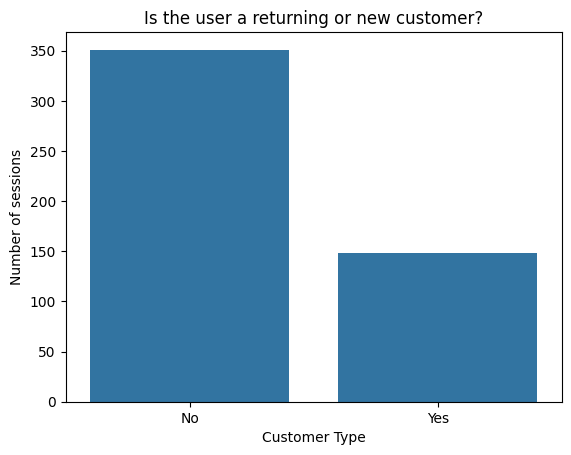

In [ ]:
plt.figure()
sns.countplot(data=df, x='returned_customer')
plt.title("Is the user a returning or new customer?")
plt.xlabel("Customer Type")
plt.ylabel("Number of sessions")
plt.show()

# 🔍 Session Duration by Platform

To begin comparing user engagement across platforms, I investigated how long users tend to stay on the platform during a session, depending on whether they use the **App** or the **Website**.

By analyzing the `session_duration` column and grouping it by `platform_used`, I aimed to answer the following:

- Which platform tends to keep users engaged for longer periods?
- Are there significant differences in session behavior between app users and website users?

To visualize this, I used a boxplot, which highlights both central tendency and variability in session times across the two platforms.

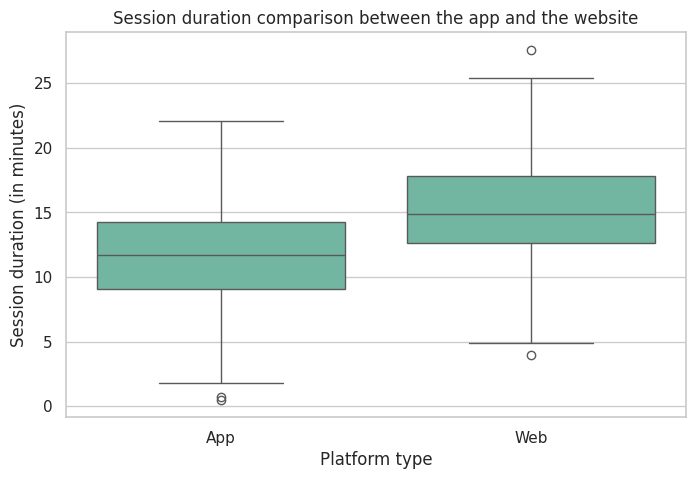

In [ ]:
# Set up the layout
sns.set(style="whitegrid", palette="Set2")
plt.figure(figsize=(8, 5))

# Draw a boxplot to compare the two platforms
sns.boxplot(data=df, x='platform_used', y='session_duration')

plt.title("Session duration comparison between the app and the website")
plt.xlabel("Platform type")
plt.ylabel("Session duration (in minutes)")
plt.show()

# 🔍 Does Longer Session Time Lead to Higher Spending?

One common assumption in e-commerce is that users who spend more time on the platform are more likely to spend more money.  
To explore this, I examined the relationship between two numerical variables: `session_duration` and `purchase_amount`.

To better understand how this relationship might differ across platforms, I also included `platform_used` as a visual distinction using color (`hue`) in the plot.

This scatter plot allows us to observe whether a longer session tends to correlate with higher spending, and whether this trend varies between app and website users.

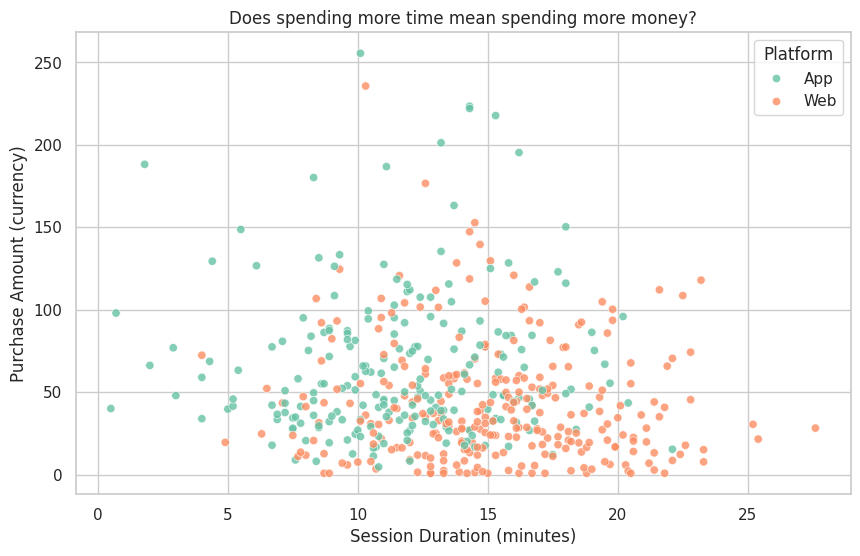

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='session_duration',
    y='purchase_amount',
    hue='platform_used',
      alpha=0.8
)
plt.title("Does spending more time mean spending more money?")
plt.xlabel("Session Duration (minutes)")
plt.ylabel("Purchase Amount (currency)")
plt.legend(title="Platform")
plt.grid(True)
plt.show()

# 🔍 Who Actually Spends More?

While time spent on a platform can indicate engagement, it doesn’t always translate directly into spending.  
So, I wanted to explore a more specific question: **which platform’s users actually spend more money on average?**

To do this, I calculated the average `purchase_amount` for each platform using a simple group-by operation, and visualized the results in a bar chart.

This helps identify which platform is more effective at **converting engagement into revenue**, and whether spending behavior is tied to session duration or perhaps influenced by other factors.

<ipython-input-18-448dd7286a90>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-18-448dd7286a90>:17: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


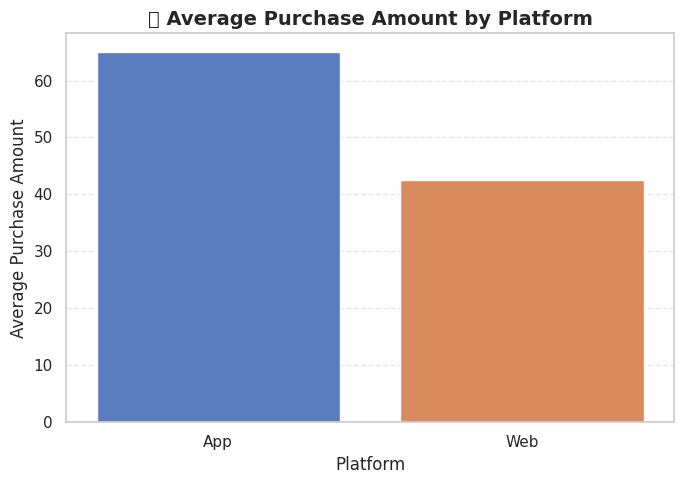

In [ ]:
plt.figure(figsize=(7, 5))

platform_avg = df.groupby('platform_used')['purchase_amount'].mean().sort_values(ascending=False)

sns.barplot(
    x=platform_avg.index,
    y=platform_avg.values,
    palette='muted'
)

plt.title("💳 Average Purchase Amount by Platform", fontsize=14, weight='bold')
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Average Purchase Amount", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 🔍 Returning vs. New Customers — Who Brings More Value?

Beyond platform differences, I was curious to explore **customer loyalty** and its impact on spending behavior.  
Specifically, I compared the `purchase_amount` between **returning customers** and **new customers**, using the `returned_customer` column.

The goal was to answer questions like:

- Do returning users spend more than new users?
- Does prior engagement translate into higher revenue?

I used a boxplot to visualize the distribution of spending between the two groups and highlight any noticeable differences.

<ipython-input-19-26baaf129587>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


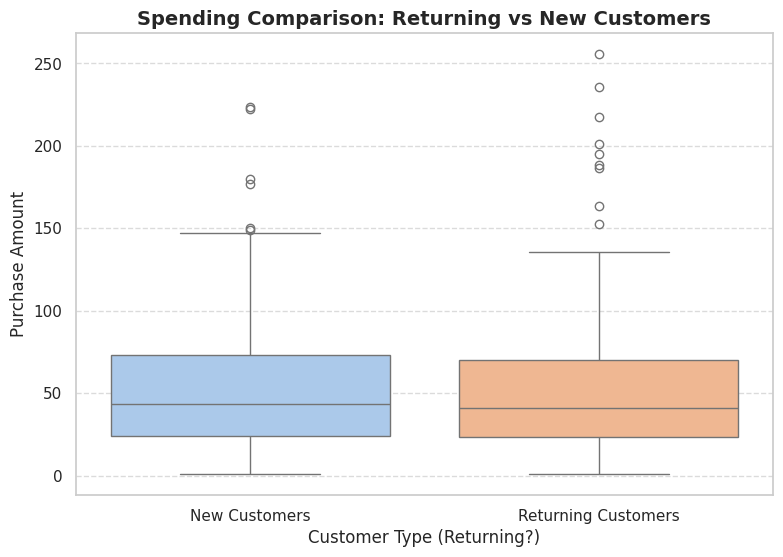

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(9, 6))
ax = sns.boxplot(
    data=df,
    x='returned_customer',
    y='purchase_amount',
    palette='pastel'
)

plt.title("Spending Comparison: Returning vs New Customers", fontsize=14, weight='bold')
plt.xlabel("Customer Type (Returning?)", fontsize=12)
plt.ylabel("Purchase Amount", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks([0, 1], ['New Customers', 'Returning Customers'])  # توضيح الأسماء
plt.show()

# 🌍 Where Are the Most Valuable Customers Located?

To better understand how geographic location influences customer behavior, I analyzed the **average purchase amount by region**.  
By grouping the data by `region` and calculating the mean `purchase_amount`, I aimed to highlight **which regions generate the most revenue per user**.

This insight can help prioritize marketing strategies, customer support efforts, or regional promotions.  
The bar chart below makes it easy to compare spending patterns across different regions.

<ipython-input-20-7e645ce678c0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


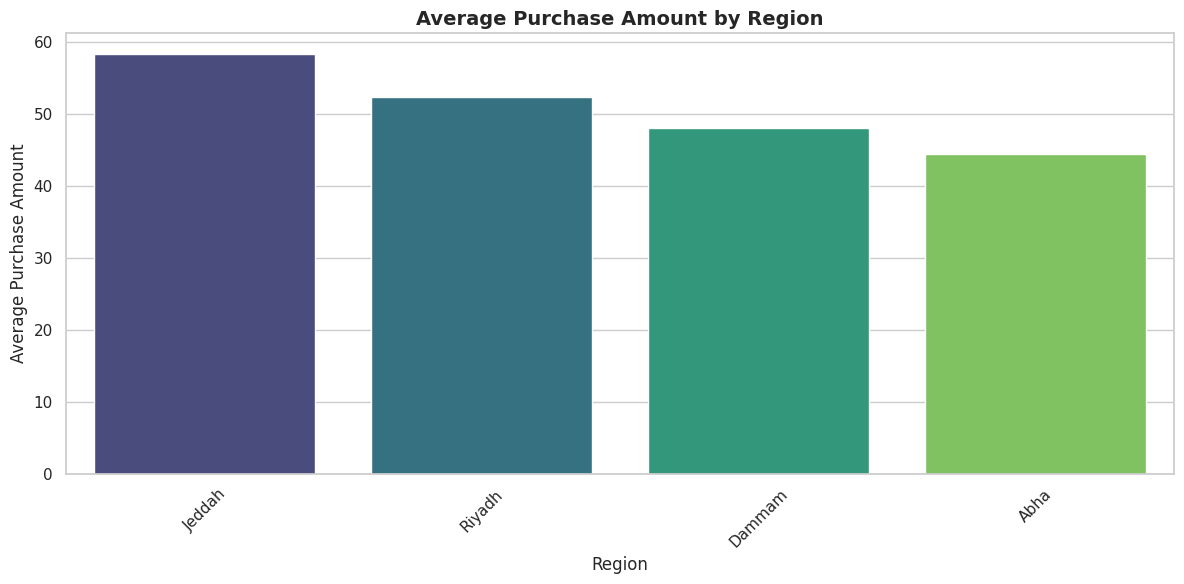

In [ ]:
region_avg = df.groupby('region')['purchase_amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=region_avg.index,
    y=region_avg.values,
    palette="viridis"
)
plt.title("Average Purchase Amount by Region", fontsize=14, weight='bold')
plt.xlabel("Region", fontsize=12)
plt.ylabel("Average Purchase Amount", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🧠 Exploring How Age and Gender Influence Spending

Toward the end of my analysis, I became curious about whether certain user characteristics—like age or gender—might influence how much people spend on the platform.

First, I looked at the relationship between **age** and **purchase amount**. I wanted to see if younger users tend to spend more, or if older users are the ones driving revenue. To get a clearer picture, I also highlighted gender differences in the visualization.

Then, I took a closer look at **gender alone**, calculating the average purchase amount for male and female users. This helped me see if there's a notable spending gap between the two groups.

Both of these visual explorations helped uncover potential patterns in user behavior that could be valuable for tailoring marketing strategies or user experience.

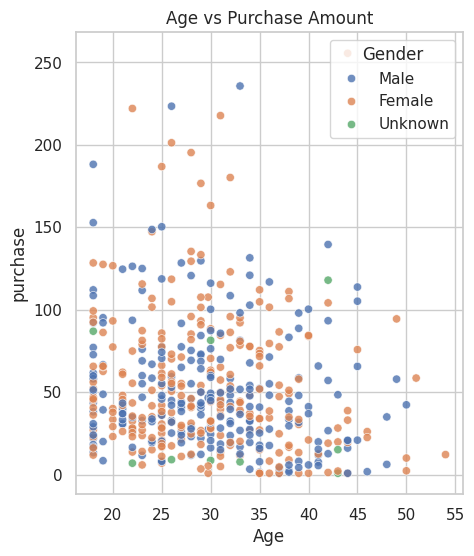

In [ ]:
plt.figure(figsize=(5, 6))
sns.scatterplot(
    data=df,
    x='age',
    y='purchase_amount',
    hue='gender',
    alpha=0.8
)
plt.title("Age vs Purchase Amount")
plt.xlabel("Age")
plt.ylabel("purchase")
plt.legend(title="Gender")
plt.grid(True)
plt.show()

<ipython-input-24-a7791acb62f6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-24-a7791acb62f6>:18: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


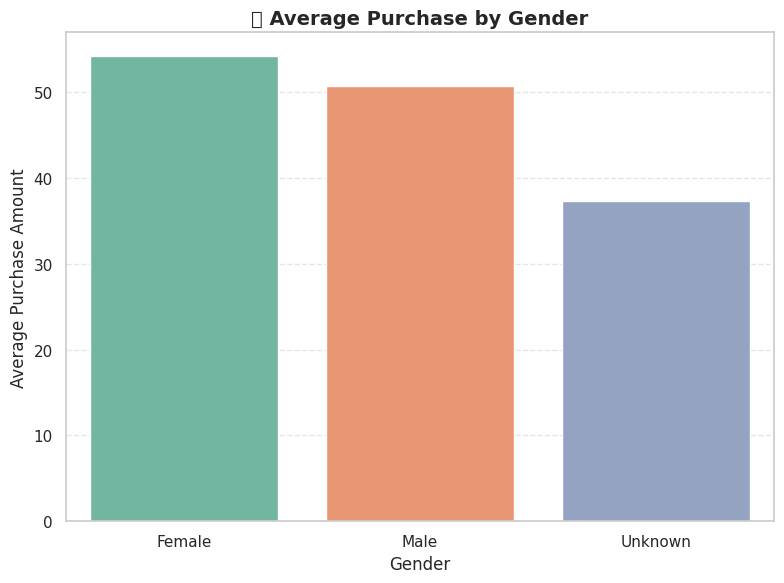

In [ ]:
plt.figure(figsize=(8, 6))

gender_avg = df.groupby('gender')['purchase_amount'].mean().sort_values(ascending=False)

sns.barplot(
    x=gender_avg.index,
    y=gender_avg.values,
    palette='Set2'
)

plt.title(" Average Purchase by Gender", fontsize=14, weight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Average Purchase Amount", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
